# HW2 - HEALTH ANALYTICS 

** Writing txt file to csv file **

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime


In [54]:
path = 'C:/Users/nisha/Dropbox/Python project/HealthAnalytics/'

In [55]:
df_cleaned = pd.read_table(path+"Cleaned_1M_inner.csv", sep = ",", encoding='latin-1')

C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,2,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**1. total costs of healthcare by gender**

In [56]:
#Grouping the refined data by SEX 
grouped=df_cleaned.groupby("SEX")

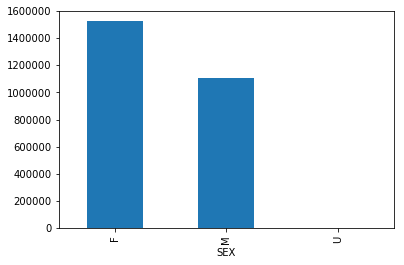

In [60]:
#Bar plot which shows that females expenditure on health care is more that men, w.r.t AMT_PAID
grouped['AMT_PAID'].agg(np.size).plot(kind="bar")
plt.show()

In [64]:
#Detailed stats for each gender category
print(grouped['AMT_PAID'].agg([np.size,np.sum, np.mean, np.std]))

          size           sum        mean          std
SEX                                                  
F    1525555.0  1.890439e+08  123.918140  1084.918794
M    1107639.0  1.589002e+08  143.458438  1434.607819
U         24.0  2.075220e+03   86.467500   147.482889


In [65]:
df_cleaned['AMT_PAID'].groupby(df_cleaned['SEX']).describe()

SEX       
F    count    1.525555e+06
     mean     1.239181e+02
     std      1.084919e+03
     min      0.000000e+00
     25%      0.000000e+00
     50%      1.468000e+01
     75%      6.800000e+01
     max      6.220211e+05
M    count    1.107639e+06
     mean     1.434584e+02
     std      1.434608e+03
     min      0.000000e+00
     25%      0.000000e+00
     50%      1.385000e+01
     75%      6.700000e+01
     max      2.648348e+05
U    count    2.400000e+01
     mean     8.646750e+01
     std      1.474829e+02
     min      0.000000e+00
     25%      0.000000e+00
     50%      2.827000e+01
     75%      7.871000e+01
     max      5.493100e+02
Name: AMT_PAID, dtype: float64

In [1]:
#print(grouped['AMT_PAID'].agg(np.mean))

**1) a.total costs of healthcare by age groups **

In [2]:
#df_cleaned['AMT_PAID'].groupby(df_cleaned['AGE_GROUPS']).describe()

In [68]:
#grouping the data by the four age groups
grouped_age=df_cleaned.groupby("AGE_GROUPS")
print(grouped_age['AMT_PAID'].agg([np.size,np.sum, np.mean, np.std]))

                 size           sum        mean          std
AGE_GROUPS                                                  
elders       733123.0  4.656248e+07   63.512503   846.811859
middleaged  1324491.0  2.198664e+08  166.000651  1393.404091
teens        205580.0  2.673164e+07  130.030343  1290.127962
youth        370024.0  5.478569e+07  148.059833  1305.847413


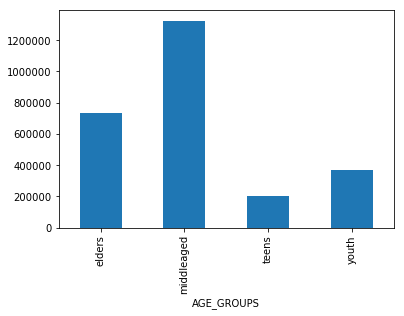

In [70]:
#maximum expenditure in the claims data due to the middle aged group
grouped_age['AMT_PAID'].agg(np.size).plot(kind="bar")
plt.show()

**b.total costs of healthcare by county of residence**

In [73]:
#grouping data by memeber county
grouped_county=df_cleaned.groupby("MEMBER_COUNTY")
print(grouped_county['AMT_PAID'].agg([np.size,np.sum, np.mean, np.std]))

                   size           sum        mean          std
MEMBER_COUNTY                                                 
1.0            144276.0  2.036567e+07  141.157708  1196.809914
3.0             94679.0  1.082059e+07  114.287140  1004.400132
5.0            117631.0  1.489616e+07  126.634631  1165.693565
7.0             58299.0  8.889875e+06  152.487614  1037.067334
9.0            137499.0  2.018189e+07  146.778442  1375.298350
11.0           665208.0  8.879631e+07  133.486533  1372.739757
13.0           301778.0  4.288785e+07  142.117216  1086.533120
15.0           575639.0  7.106074e+07  123.446706  1244.591551
17.0           197629.0  2.673911e+07  135.299535  1154.934266
19.0            69154.0  1.020725e+07  147.601712  1299.884101
999.0          271426.0  3.310073e+07  121.951222  1226.962640


In [3]:
#stats per county
#df_cleaned['AMT_PAID'].groupby(df_cleaned['MEMBER_COUNTY']).describe()

**c)total costs of healthcare by county of in state and out of state patients**

In [ ]:
#grouping data into instate and outstate
grouped_state=df_cleaned.groupby("IN/OUT_STATE")
print(grouped_state['AMT_PAID'].agg([np.size,np.sum, np.mean, np.std]))

In [81]:
#grouped_state['AMT_PAID'].value_counts().plot(kind="bar")

In [82]:
df_cleaned['AMT_PAID'].groupby(df_cleaned['IN/OUT_STATE']).describe()

IN/OUT_STATE       
instate       count    2.361792e+06
              mean     1.333079e+02
              std      1.246028e+03
              min      0.000000e+00
              25%      0.000000e+00
              50%      1.466000e+01
              75%      6.900000e+01
              max      6.220211e+05
outstate      count    2.714260e+05
              mean     1.219512e+02
              std      1.226963e+03
              min      0.000000e+00
              25%      0.000000e+00
              50%      1.156000e+01
              75%      5.465000e+01
              max      2.648348e+05
Name: AMT_PAID, dtype: float64

**d)What health conditions, based on the frequency of primary ICD are most prevalent by state of residence and also by gender?**

In [83]:
#columns present in the DF
#df_cleaned.columns

Index(['Unnamed: 0', 'ADM_SRC', 'ADM_TYPE', 'AGE', 'AMT_BILLED', 'AMT_COINS',
       'AMT_COPAY', 'AMT_DEDUCT', 'AMT_PAID', 'AMT_PREPAID', 'CASES',
       'CLAIM_ID_KEY', 'CLIENT_LOS', 'ICD_10_OR_HIGHER', 'ICD_DIAG_01_PRIMARY',
       'ICD_DIAG_02', 'ICD_DIAG_03', 'ICD_DIAG_04', 'ICD_DIAG_ADMIT',
       'ICD_PROC_01_PRI', 'LOB', 'MEMBER_COUNTY', 'MEMBER_STATE', 'PROC_CODE',
       'SEX', 'SV_LINE', 'UB_BILL_TYPE', 'UTILS', 'IN/OUT_STATE',
       'AGE_GROUPS'],
      dtype='object')

** Female Instate**

In [84]:
df_F=grouped.get_group('F')
grouped_F_IN=df_F.groupby(df_F['IN/OUT_STATE'])

In [85]:
df_F_IN=grouped_F_IN.get_group('instate')
F_IN=df_F_IN['ICD_DIAG_01_PRIMARY'].value_counts().head(5)#.plot(kind='bar')
#plt.title('Top 5 prevalent health conditions forwomen belonging instate')

In [86]:
F_IN

Z0000     49126
Z1231     36293
Z23       24187
Z00129    18476
M545      16763
Name: ICD_DIAG_01_PRIMARY, dtype: int64

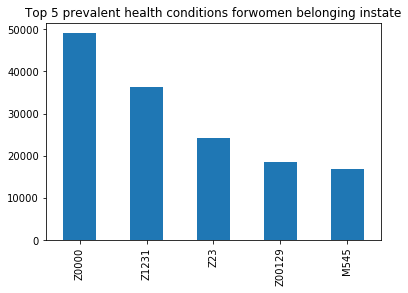

In [88]:
#Majority claims in NH for women for medical/health check ups
F_IN.plot(kind='bar')
plt.title('Top 5 prevalent health conditions for women belonging instate')
plt.show()


**Female,Out of state**

In [89]:
#Women visiting New Hampshire from other states come to NH for medical check ups
df_F_OUT=grouped_F_IN.get_group('outstate')
F_OUT=df_F_OUT['ICD_DIAG_01_PRIMARY'].value_counts().head(5)#.plot(kind='bar')
F_OUT

Z0000     5207
Z1231     3552
Z00129    2803
Z23       2703
I10       2224
Name: ICD_DIAG_01_PRIMARY, dtype: int64

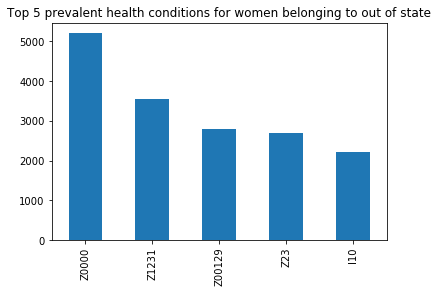

In [90]:
F_OUT.plot(kind='bar')
plt.title('Top 5 prevalent health conditions for women belonging to out of state')
plt.show()

**Male Instate**

In [91]:
df_M=grouped.get_group('M')
grouped_M_state=df_M.groupby(df_M['IN/OUT_STATE'])


In [92]:
df_M_IN=grouped_M_state.get_group('instate')
M_IN=df_M_IN['ICD_DIAG_01_PRIMARY'].value_counts().head(5)#.plot(kind='bar')
M_IN

Z0000     38565
N186      24749
Z23       19414
G4733     18950
Z00129    18261
Name: ICD_DIAG_01_PRIMARY, dtype: int64

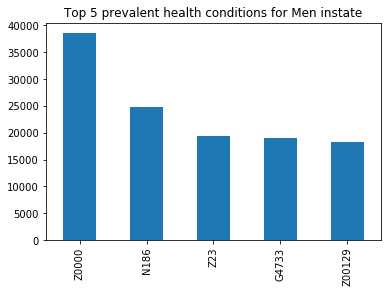

In [93]:
#Majority of the claims in NH by men are for medical/health checkups
M_IN.plot(kind='bar')
plt.title('Top 5 prevalent health conditions for Men instate')
plt.show()

**Male out of state**

In [94]:
#Majority of claims from men outside of NH for general checkups
df_M_OUT=grouped_M_state.get_group('outstate')
M_OUT=df_M_OUT['ICD_DIAG_01_PRIMARY'].value_counts().head(5)#.plot(kind='bar')
M_OUT

Z0000     4813
Z00129    2807
Z23       2383
I10       2319
N186      2018
Name: ICD_DIAG_01_PRIMARY, dtype: int64

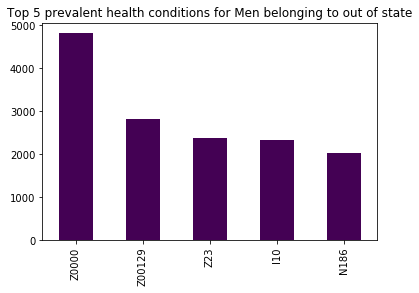

In [95]:
import viridis
M_OUT.plot(kind='bar',cmap='viridis')
plt.title('Top 5 prevalent health conditions for Men belonging to out of state')
plt.show()

**c)What health conditions, based on the total cost of care (amount paid) of primary ICD are most prevalent by state of residence and also by gender? **

** prevalent ICD for AMT_PAID by Female, Instate**

In [177]:
disease = pd.read_csv('C:/Users/nisha/Documents/DATA 900/Data Architechture/Big assignment/PUBLICUSE_REF_TABLES/REF_ICD_DIAG.csv')

In [178]:
df_F_IN_ICD= pd.DataFrame({'ICD_DIAG_01_PRIMARY':F_IN.index, 'freq':F_IN.values})


In [179]:
disease.columns

Index(['ICD_DIAG_01_PRIMARY', 'ICD_DIAG_DESC'], dtype='object')

In [180]:
sum_F_IN=[]
ICD_F_IN=[]
df_F_IN_ICDSum=pd.DataFrame()


In [181]:
ICD=df_F_IN_ICD['ICD_DIAG_01_PRIMARY']
sum_F_IN=[]
ICD_F_IN=[]
for i in range(0,5):
  df_F_IN_Prev=df_F_IN[df_F_IN['ICD_DIAG_01_PRIMARY'] ==ICD.values[i]]  
  #ICD_F_IN.append(df_F_IN_Prev['ICD_DIAG_01_PRIMARY']) 
  ICD_F_IN.append(ICD.values[i])
  sum_F_IN.append(sum(df_F_IN_Prev['AMT_PAID']))
 


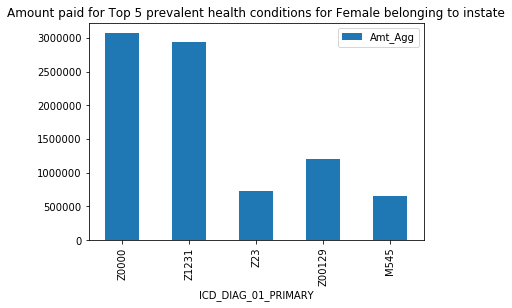

In [187]:
df_F_IN_ICDSum['ICD_DIAG_01_PRIMARY']= ICD_F_IN
df_F_IN_ICDSum['Amt_Agg']= sum_F_IN

df_F_IN_ICDSum.set_index('ICD_DIAG_01_PRIMARY').plot(kind='bar')

#plt.xticks(df_F_IN_ICDSum['ICD'],ICD_F_IN)
plt.title('Amount paid for Top 5 prevalent health conditions for Female belonging to instate')
plt.show()

In [189]:
new11 = pd.merge(df_F_IN_ICDSum, disease, how='inner',on=['ICD_DIAG_01_PRIMARY'])
new11

,ICD_DIAG_01_PRIMARY,Amt_Agg,ICD_DIAG_DESC
0,Z0000,3070774.00,Encntr for general adult medical exam w/o abno...
1,Z1231,2933415.16,Encntr screen mammogram for malignant neoplasm...
2,Z23,730108.42,Encounter for immunization
3,Z00129,1197378.51,Encntr for routine child health exam w/o abnor...
4,M545,654500.01,Low back pain


** prevalent ICD for AMT_PAID Female, Outstate**

In [190]:
df_F_OUT_ICD= pd.DataFrame({'ICD_DIAG_01_PRIMARY':F_OUT.index, 'freq':F_OUT.values})

In [191]:
sum_F_OUT=[]
ICD_F_OUT=[]
df_F_OUT_ICDSum=pd.DataFrame()


In [197]:
ICD=df_F_OUT_ICD['ICD_DIAG_01_PRIMARY']
sum_F_OUT=[]
ICD_F_OUT=[]
for i in range(0,5):
  df_F_OUT_Prev=df_F_OUT[df_F_OUT['ICD_DIAG_01_PRIMARY'] ==ICD.values[i]]  
  #ICD_F_IN.append(df_F_IN_Prev['ICD_DIAG_01_PRIMARY']) 
  ICD_F_OUT.append(ICD.values[i])
  sum_F_OUT.append(sum(df_F_OUT_Prev['AMT_PAID']))
 


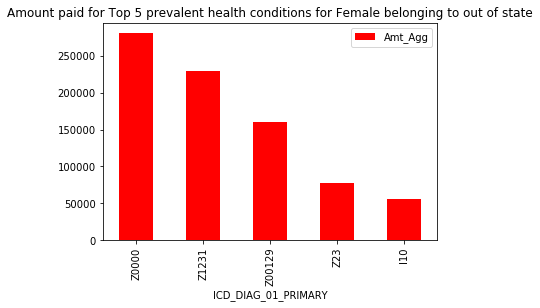

In [198]:
df_F_OUT_ICDSum['ICD_DIAG_01_PRIMARY']= ICD_F_OUT
df_F_OUT_ICDSum['Amt_Agg']= sum_F_OUT

df_F_OUT_ICDSum.set_index('ICD_DIAG_01_PRIMARY').plot(kind='bar',color='r')
#plt.xticks(df_F_IN_ICDSum['ICD'],ICD_F_IN)
plt.title('Amount paid for Top 5 prevalent health conditions for Female belonging to out of state')
plt.show()

In [207]:
new2 = pd.merge(df_F_OUT_ICDSum, disease, how='inner',on=['ICD_DIAG_01_PRIMARY'])
cols=['ICD_DIAG_01_PRIMARY','Amt_Agg','ICD_DIAG_DESC']
new2[cols]

,ICD_DIAG_01_PRIMARY,Amt_Agg,ICD_DIAG_DESC
0,Z0000,281130.32,Encntr for general adult medical exam w/o abno...
1,Z1231,229434.51,Encntr screen mammogram for malignant neoplasm...
2,Z00129,159897.31,Encntr for routine child health exam w/o abnor...
3,Z23,78246.68,Encounter for immunization
4,I10,55469.26,Essential (primary) hypertension


** prevalent ICD for AMT_PAID by Male, Intstate**

In [208]:
df_M_IN_ICD= pd.DataFrame({'ICD_DIAG_01_PRIMARY':M_IN.index, 'freq':M_IN.values})


In [209]:
sum_M_IN=[]
ICD_M_IN=[]
df_M_IN_ICDSum=pd.DataFrame()


In [210]:
ICD=df_M_IN_ICD['ICD_DIAG_01_PRIMARY']
sum_M_IN=[]
ICD_M_IN=[]
for i in range(0,5):
  df_M_IN_Prev=df_M_IN[df_M_IN['ICD_DIAG_01_PRIMARY'] ==ICD.values[i]]  
  #ICD_F_IN.append(df_F_IN_Prev['ICD_DIAG_01_PRIMARY']) 
  ICD_M_IN.append(ICD.values[i])
  sum_M_IN.append(sum(df_M_IN_Prev['AMT_PAID']))
 


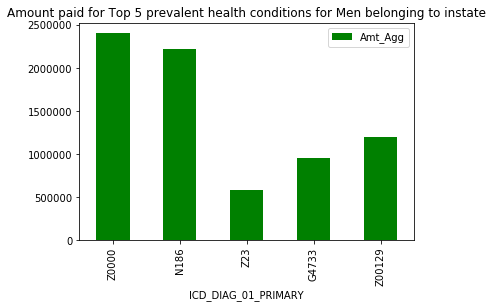

In [211]:
df_M_IN_ICDSum['ICD_DIAG_01_PRIMARY']= ICD_M_IN
df_M_IN_ICDSum['Amt_Agg']= sum_M_IN

df_M_IN_ICDSum.set_index('ICD_DIAG_01_PRIMARY','AMT_PAID agg.').plot(kind='bar',color='g')
#plt.xticks(df_F_IN_ICDSum['ICD'],ICD_F_IN)
plt.title('Amount paid for Top 5 prevalent health conditions for Men belonging to instate')
plt.show()

In [214]:
new3 = pd.merge(df_M_IN_ICDSum, disease, how='inner',on=['ICD_DIAG_01_PRIMARY'] )
new3[cols]

,ICD_DIAG_01_PRIMARY,Amt_Agg,ICD_DIAG_DESC
0,Z0000,2406101.67,Encntr for general adult medical exam w/o abno...
1,N186,2218627.12,End stage renal disease
2,Z23,587233.12,Encounter for immunization
3,G4733,949118.60,Obstructive sleep apnea (adult) (pediatric)
4,Z00129,1194350.01,Encntr for routine child health exam w/o abnor...


** prevalent ICD for AMT_PAID Male, Outstate**

In [215]:
df_M_OUT_ICD= pd.DataFrame({'ICD_DIAG_01_PRIMARY':M_OUT.index, 'freq':M_OUT.values})


In [216]:
sum_M_OUT=[]
ICD_M_OUT=[]
df_M_OUT_ICDSum=pd.DataFrame()


In [218]:
ICD=df_M_OUT_ICD['ICD_DIAG_01_PRIMARY']
sum_M_OUT=[]
ICD_M_OUT=[]
for i in range(0,5):
  df_M_OUT_Prev=df_M_OUT[df_M_OUT['ICD_DIAG_01_PRIMARY'] ==ICD.values[i]]  
  #ICD_F_IN.append(df_F_IN_Prev['ICD_DIAG_01_PRIMARY']) 
  ICD_M_OUT.append(ICD.values[i])
  sum_M_OUT.append(sum(df_M_OUT_Prev['AMT_PAID']))
 


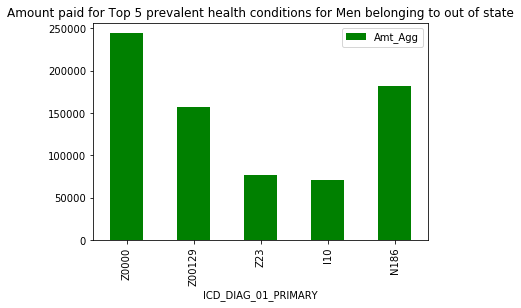

In [223]:
df_M_OUT_ICDSum['ICD_DIAG_01_PRIMARY']= ICD_M_OUT
df_M_OUT_ICDSum['Amt_Agg']= sum_M_OUT
df_M_OUT_ICDSum.set_index('ICD_DIAG_01_PRIMARY','AMT_PAID agg.').plot(kind='bar',color='g')
#plt.xticks(df_F_IN_ICDSum['ICD'],ICD_F_IN)
plt.title('Amount paid for Top 5 prevalent health conditions for Men belonging to out of state')
plt.show()

In [222]:
new4 = pd.merge(df_M_OUT_ICDSum, disease, how='inner',on=['ICD_DIAG_01_PRIMARY'] )
new4[cols]

,ICD_DIAG_01_PRIMARY,Amt_Agg,ICD_DIAG_DESC
0,Z0000,244615.32,Encntr for general adult medical exam w/o abno...
1,Z00129,157121.53,Encntr for routine child health exam w/o abnor...
2,Z23,77300.65,Encounter for immunization
3,I10,70920.82,Essential (primary) hypertension
4,N186,182071.00,End stage renal disease


## 2. Analysis of health conditions

**Top 3 expensive health conditions for NH residents by AMT_BILLED**

In [236]:
# Grouping the data by in/out state
grouped_residents=df_cleaned.groupby(df_F['IN/OUT_STATE'])
df_IN=grouped_residents.get_group('instate')

In [237]:
# for in state
df_IN['AMT_BILLED'].head(5)

0    3980.00
1     405.78
2    3980.00
3      68.85
7     158.00
Name: AMT_BILLED, dtype: float64

In [238]:
df_IN.drop(df_IN[df_IN.AMT_BILLED < 0].index, inplace=True)

C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [239]:
df_IN_BILLED = df_IN.sort(['AMT_BILLED'],ascending=False)

C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [ ]:
cols = ['AMT_BILLED','ICD_DIAG_01_PRIMARY']
alpha = df_IN_BILLED[cols].head(3)
#df_IN_BILLED['AMT_BILLED','ICD_DIAG_01_PRIMARY'].head(5)
alpha


In [251]:
new5 = pd.merge(alpha, disease, how='inner',on=['ICD_DIAG_01_PRIMARY'] )
new5

,AMT_BILLED,ICD_DIAG_01_PRIMARY,ICD_DIAG_DESC
0,382801.77,C8339,"Diffuse large B-cell lymphoma, extrnod and sol..."
1,375455.00,J9602,Acute respiratory failure with hypercapnia
2,348981.51,O364XX0,"Maternal care for intrauterine death, not appl..."


**Top 3 expensive health conditions for out of state residents by AMT_BILLED**

In [252]:
# Grouping the data by in/out state
grouped_residents=df_cleaned.groupby(df_F['IN/OUT_STATE'])
df_OUT=grouped_residents.get_group('outstate')

In [264]:
df_OUT.drop(df_OUT[df_OUT.AMT_BILLED < 0].index, inplace=True)

C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [268]:
df_OUT_BILLED = df_OUT.sort(['AMT_BILLED'],ascending=False)
df_OUT_BILLED['AMT_BILLED'].head(5)

C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


2433023    231206.00
2388892    194210.63
2433019    184608.00
2422638    135283.82
1957398    134356.15
Name: AMT_BILLED, dtype: float64

In [269]:
cols = ['AMT_BILLED','ICD_DIAG_01_PRIMARY']
beta = df_OUT_BILLED[cols].head(4)
beta

#df_IN_BILLED['AMT_BILLED','ICD_DIAG_01_PRIMARY'].head(5)

,AMT_BILLED,ICD_DIAG_01_PRIMARY
2433023,231206.00,Z3800
2388892,194210.63,K5641
2433019,184608.00,Z3800
2422638,135283.82,Z421


In [270]:
new5 = pd.merge(beta, disease, how='inner',on=['ICD_DIAG_01_PRIMARY'] )
new5

,AMT_BILLED,ICD_DIAG_01_PRIMARY,ICD_DIAG_DESC
0,231206.00,Z3800,"Single liveborn infant, delivered vaginally"
1,184608.00,Z3800,"Single liveborn infant, delivered vaginally"
2,194210.63,K5641,Fecal impaction
3,135283.82,Z421,Encounter for breast reconstruction following ...


# 3. Analysis of the sickest patients

In [271]:
# sorting the original data by SV_LINE in descending order 
df_SV = df_cleaned.sort(['SV_LINE'],ascending=False)

C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [272]:
# assumed first row as sickest
cols = ['SV_LINE','CLAIM_ID_KEY','ICD_DIAG_01_PRIMARY']
sickest=df_SV[cols].head(1)
sickest

,SV_LINE,CLAIM_ID_KEY,ICD_DIAG_01_PRIMARY
44792,2060.0,118704380,T8641


In [273]:
sickest['CLAIM_ID_KEY'].values

array([118704380], dtype=int64)

In [336]:
df_Sickest = df_SV[(df_SV['CLAIM_ID_KEY'] == 118704380)]
df_Sickest.shape

(206, 30)

In [341]:
np.sum(df_Sickest['AMT_BILLED'])

22222.119999999977

 OR group by claim_ID and agrregate their AMT_BILLED to find the sickest one.

In [286]:
#instate
grouped_state = df_cleaned.groupby("IN/OUT_STATE")
ins = grouped_state.get_group('instate')

z=ins.groupby(['CLAIM_ID_KEY','ICD_DIAG_01_PRIMARY'], as_index=False)['AMT_BILLED'].sum()
gamma = z.sort(['AMT_BILLED'],ascending=False).head(5)

new6 = pd.merge(gamma, disease, how='inner',on=['ICD_DIAG_01_PRIMARY'] )
new6

C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,CLAIM_ID_KEY,ICD_DIAG_01_PRIMARY,AMT_BILLED,ICD_DIAG_DESC
0,119396347,E840,1710110.28,Cystic fibrosis with pulmonary manifestations
1,118160849,M5117,1630984.16,"Intvrt disc disorders w radiculopathy, lumbosa..."
2,251428539,D61810,1066907.06,Antineoplastic chemotherapy induced pancytopenia
3,118225542,C8339,1066783.54,"Diffuse large B-cell lymphoma, extrnod and sol..."
4,118347258,A419,919547.64,"Sepsis, unspecified organism"


In [301]:
a = ins[(ins['CLAIM_ID_KEY'] == 119396347)]
a.to_csv('C:/Users/nisha/Dropbox/Python project/HealthAnalytics/sickest_instate.csv')

In [302]:
#outstate
outs = grouped_state.get_group('outstate')
z=outs.groupby(['CLAIM_ID_KEY','ICD_DIAG_01_PRIMARY'], as_index=False)['AMT_BILLED'].sum()
delta = z.sort(['AMT_BILLED'],ascending=False).head(5)

new7 = pd.merge(delta, disease, how='inner',on=['ICD_DIAG_01_PRIMARY'] )
new7

C:\Users\nisha\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,CLAIM_ID_KEY,ICD_DIAG_01_PRIMARY,AMT_BILLED,ICD_DIAG_DESC
0,15748474,T827XXA,3115189.50,Infect/inflm react d/t oth cardi/vasc dev/impl...
1,17665422,I25710,713876.22,Athscl autologous vein CABG w unstable angina ...
2,39062649,K5641,612218.24,Fecal impaction
3,3402188,M4806,506552.96,"Spinal stenosis, lumbar region"
4,119011079,I214,496455.92,Non-ST elevation (NSTEMI) myocardial infarction


In [306]:
b = outs[(outs['CLAIM_ID_KEY'] == 15748474)]
b.to_csv('C:/Users/nisha/Dropbox/Python project/HealthAnalytics/sickest_outstate.csv')

#END